In [19]:
using SymPy

# Variables que no tienen valor
@vars x z x0 z0 E_0 k a F_e

a_val=1
x0_val = a_val/4



#sympy.init_printing(pretty_print=False, use_unicode=False, wrap_line=False, no_global=True)

# Tomlinson potential V(x,z)
Vpotencial = E_0/2 * (1-cos((2*PI*x/a))) + k/2 * (z-x)^2

   ⎛       ⎛2⋅π⋅x⎞⎞              
E₀⋅⎜1 - cos⎜─────⎟⎟             2
   ⎝       ⎝  a  ⎠⎠   k⋅(-x + z) 
─────────────────── + ───────────
         2                 2     

In [2]:
V_x = diff(Vpotencial,x)

        ⎛2⋅π⋅x⎞                
π⋅E₀⋅sin⎜─────⎟                
        ⎝  a  ⎠   k⋅(2⋅x - 2⋅z)
─────────────── + ─────────────
       a                2      

In [3]:
V_xx = diff(V_x,x)

   2       ⎛2⋅π⋅x⎞    
2⋅π ⋅E₀⋅cos⎜─────⎟    
           ⎝  a  ⎠    
────────────────── + k
         2            
        a             

In [4]:
V_xxx = diff(V_xx,x)

    3       ⎛2⋅π⋅x⎞ 
-4⋅π ⋅E₀⋅sin⎜─────⎟ 
            ⎝  a  ⎠ 
────────────────────
          3         
         a          

In [5]:
# Taylor approximation of Tomlinson potential
Vp_taylor = Vpotencial.subs(x,x0) + V_x.subs(x,x0)*(x-x0) + V_xx.subs(x,x0)/2 * (x-x0)^2 +  V_xxx.subs(x,x0)/6*(x-x0)^3

   ⎛       ⎛2⋅π⋅x₀⎞⎞      3            3    ⎛2⋅π⋅x₀⎞                          
E₀⋅⎜1 - cos⎜──────⎟⎟   2⋅π ⋅E₀⋅(x - x₀) ⋅sin⎜──────⎟              2           
   ⎝       ⎝  a   ⎠⎠                        ⎝  a   ⎠   k⋅(-x₀ + z)            
──────────────────── - ───────────────────────────── + ──────────── + (x - x₀)
         2                             3                    2                 
                                    3⋅a                                       

  ⎛ 2       ⎛2⋅π⋅x₀⎞    ⎞            ⎛        ⎛2⋅π⋅x₀⎞                 ⎞
  ⎜π ⋅E₀⋅cos⎜──────⎟    ⎟            ⎜π⋅E₀⋅sin⎜──────⎟                 ⎟
2 ⎜         ⎝  a   ⎠   k⎟            ⎜        ⎝  a   ⎠   k⋅(2⋅x₀ - 2⋅z)⎟
 ⋅⎜───────────────── + ─⎟ + (x - x₀)⋅⎜──────────────── + ──────────────⎟
  ⎜         2          2⎟            ⎝       a                 2       ⎠
  ⎝        a            ⎠                                               

In [79]:
X_m = (F*a^2/(2*PI^2*E_0)).subs(E_0,F_e*a/PI)

 F⋅a  
──────
2⋅π⋅Fₑ

In [85]:
X_M = (((2*PI^2*E_0 + k*a^2)*X_m - PI^2*a*E_0)/(k*a^2-2*PI^2*E_0)).subs(E_0,F_e*a/PI)

    ⎛            2  ⎞          
F⋅a⋅⎝2⋅π⋅Fₑ⋅a + a ⋅k⎠         2
───────────────────── - π⋅Fₑ⋅a 
        2⋅π⋅Fₑ                 
───────────────────────────────
                     2         
        -2⋅π⋅Fₑ⋅a + a ⋅k       

In [86]:
simplify(Vp_taylor.subs(x0,a/2).subs(x,X_M) - Vp_taylor.subs(x0,0).subs(x,X_m)).subs(E_0,F_e*a/pi)

                                                                              
   2               2 ⎛            2  ⎞                                2    2  
- F ⋅(2⋅π⋅Fₑ - a⋅k) ⋅⎝2⋅π⋅Fₑ⋅a + a ⋅k⎠ + 4⋅π⋅F⋅Fₑ⋅a⋅k⋅z⋅(2⋅π⋅Fₑ - a⋅k)  + π ⋅F
                                                                              
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                                                                              
 2               2 ⎛8⋅Fₑ⋅a        2              2⎞                           
ₑ ⋅(2⋅π⋅Fₑ - a⋅k) ⋅⎜────── - 4⋅k⋅z  + k⋅(a - 2⋅z) ⎟ - 2⋅π⋅Fₑ⋅a⋅k⋅(a - 2⋅z)⋅(2⋅
                   ⎝  π                           ⎠                           
──────────────────────────────────────────────────────────────────────────────
                                                   

## Cálculo $x_m$ y $x_M$ 

In [8]:
diff(Vp_taylor.subs(x0,0),x)

           ⎛ 2       ⎞
           ⎜π ⋅E₀   k⎟
-k⋅z + 2⋅x⋅⎜───── + ─⎟
           ⎜   2    2⎟
           ⎝  a      ⎠

In [9]:
# Z
z_ = simplify(solve(diff(Vp_taylor.subs(x0,0),x),z))[1]

   2         
2⋅π ⋅E₀⋅x    
───────── + x
    2        
   a ⋅k      

In [10]:
x_min = simplify(solve(diff(Vp_taylor.subs(x0,0),x),x))[1]

     2        
    a ⋅k⋅z    
──────────────
   2       2  
2⋅π ⋅E₀ + a ⋅k

In [11]:
x_max = simplify(solve(diff(Vp_taylor.subs(x0,a/2),x),x))[1]

  ⎛ 2           ⎞
a⋅⎝π ⋅E₀ - a⋅k⋅z⎠
─────────────────
     2       2   
  2⋅π ⋅E₀ - a ⋅k 

In [12]:
# FUERZA = K(Z-x_min)
F_ = simplify(k*(z_-x))

   2     
2⋅π ⋅E₀⋅x
─────────
     2   
    a    

In [13]:
# Sustituyendo x_min
simplify(F_.subs(x,x_min))

    2         
 2⋅π ⋅E₀⋅k⋅z  
──────────────
   2       2  
2⋅π ⋅E₀ + a ⋅k

In [14]:
# Expresión para x_min
@vars F
x*F/F_

     2 
  F⋅a  
───────
   2   
2⋅π ⋅E₀

In [15]:
# Expresión para Z
F/(F_.subs(x,x_min))*z

  ⎛   2       2  ⎞
F⋅⎝2⋅π ⋅E₀ + a ⋅k⎠
──────────────────
       2          
    2⋅π ⋅E₀⋅k     

In [20]:
simplify(Vp_taylor.subs(x0,a/2)-Vp_taylor.subs(x0,0))

   2            2           2     2
  π ⋅E₀        π ⋅E₀⋅x   2⋅π ⋅E₀⋅x 
- ───── + E₀ + ─────── - ──────────
    4             a           2    
                             a     

In [ ]:
(simplify(Vp_taylor.subs(x0,a/2)-Vp_taylor.subs(x0,0)))

In [32]:
using Plots

function graf(X0, Z)
    xs = range(-1, stop=1.5, length=75)

    # Gráfica potencial
    gn = lambdify(Vpotencial.subs(E_0,1).subs(k,1).subs(a,a_val).subs(x0,X0).subs(z,Z))
    Plots.plot(xs, gn.(xs), label="Aproximación Taylor", lw=4, xlims=(-0.25,1.25), ylims=(-0.25,1.25))

    # Gráfica Aprox Taylor potencial
    fn = lambdify(Vp_taylor.subs(E_0,1).subs(k,1).subs(a,a_val).subs(x0,X0).subs(z,Z))

    Plots.plot!(xs, fn.(xs), label="Potencial Tomlinson",lw=4)


    xlabel!("x")
    ylabel!("V(x)")
end

graf (generic function with 2 methods)

In [17]:
#=
using PlotlyJS

function grafJS(X0)
    xs = range(-1, stop=1.5, length=50)

    # Gráfica potencial
    gn = lambdify(Vpotencial.subs(E_0,1).subs(k,1).subs(a,a_val).subs(x0,X0).subs(z0,0).subs(z,0))
    fn = lambdify(Vp_taylor.subs(E_0,1).subs(k,1).subs(a,a_val).subs(x0,X0).subs(z0,0).subs(z,0))

    traceVp = PlotlyJS.scatter(x=xs, y=gn.(xs), mode="lines", name="Potencial Tomlinson", line=attr(width=4))
    traceTayor = PlotlyJS.scatter(x=xs, y=fn.(xs), mode="lines", name="Aproximación Taylor", line=attr(width=4))
    layout = Layout(title="Potencial Tomlinson", xaxis_title="x", yaxis_title="V(x)", xaxis=attr(range=[-0.25,1.25]), yaxis=attr(range=[-0.25,1.25]))
    PlotlyJS.plot([traceVp, traceTayor], layout)

    # Gráfica Aprox Taylor potencial
    
end
=#

ErrorException: syntax: incomplete: unterminated multi-line comment #= ... =#

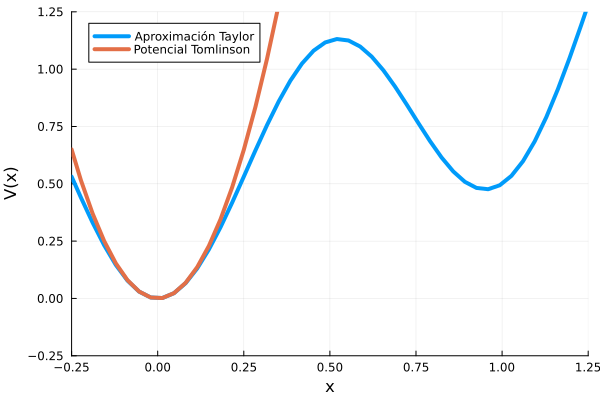

In [33]:
x0_val = 0
graf(x0_val, 0)

┌ Info: Saved animation to /tmp/jl_z47aP6LsvE.gif
└ @ Plots /home/kiernan/.julia/packages/Plots/tDI0A/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_z47aP6LsvE.gif")
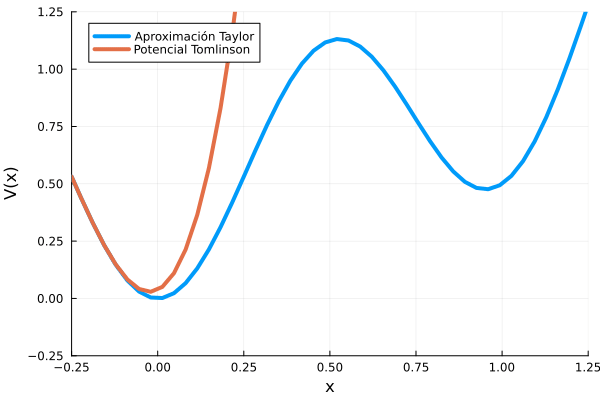

In [30]:
anim = @animate for i in -0.25:0.05:1.25
    graf(i,0)
end

gif(anim, fps=9)

┌ Info: Saved animation to /tmp/jl_1iti5gLU3a.gif
└ @ Plots /home/kiernan/.julia/packages/Plots/tDI0A/src/animation.jl:156


Plots.AnimatedGif("/tmp/jl_1iti5gLU3a.gif")
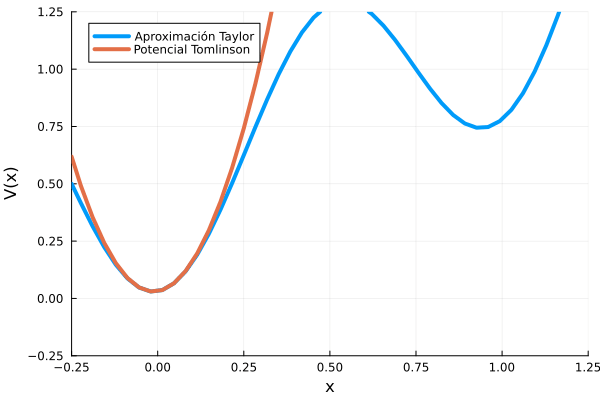

In [34]:
anim = @animate for i in -0.25:0.05:1.25
    graf(0,i)
end

gif(anim, fps=9)

# Cálculo máximos y mínimos

In [31]:
x_maxima = solve(diff(Vp_taylor,x),x)

In [68]:
y_maxima = [Vp_taylor.subs(E_0,1).subs(k,1).subs(a,a_val).subs(x0,x0_val).subs(z0,0).subs(z,0)(x_value) for x_value in x_maxima]
y_maxima.evalf()

2×1 Matrix{Sym}:
 0.0288952794504119
   1.08834009423629

In [69]:
xs = range(-1, stop=a_val-0.1, length=256)
VPmin = findmin(Vpotencial.subs(k,1).subs(z,0).subs(E_0,1).subs(a,1).(xs))[1].evalf()

2.55151698741050e-5

In [70]:
VPmax = findmax(Vpotencial.subs(k,1).subs(z,0).subs(E_0,1).subs(a,1).(xs))[1].evalf()

1.13168338509208

In [71]:
# Error
VPmax - y_maxima[1].evalf()

1.10278810564167

In [72]:
# Error relativo
(VPmax - y_maxima[1].evalf())/VPmax * 100

97.4466993303025